---
# Ejercicio 1
El siguiente codigo simula valores de una variable aleatoria X.

In [21]:
from random import random
from typing import Callable
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
pallete = sns.color_palette('rocket')

In [ ]:
A = [0,1,1,2,2,2,3,3,3]
B = [0,0,0,1,1,2,2,2,2,2]

def UrnaX():
    U = random()
    if U < 0.9:
        return A[int(random() * 9)]
    else:
        return B[int(random() * 10)]

    

**a)** Dar la funcion de probabilidad de masa de la variable X

La fpm de X está dada por:
$$
p_X(x) =
\begin{cases}
    0.13 \quad \text{si } x = 0\\[0.3cm]
    0.22 \quad \text{si } x = 1\\[0.3cm]
    0.35 \quad \text{si } x = 2\\[0.3cm]
    0.30 \quad \text{si } x = 3
\end{cases}
$$


In [18]:
def p_X(x: int) -> float:
    """
    Función de probabilidad de masa de X

    Args:
        x (int): Valor en el dominio de p

    Returns:
        float: Probabilidad para x
    """
    probs = {
        0: 0.13,
        1: 0.22,
        2: 0.35,
        3: 0.30
    }
    return probs.get(x, 0.0)

**b)** Dar un algoritmo basado en el metodo de aceptación y rechazo para generar valores de la misma variable. 

▶ Escribir el correspondiente codigo en Python *algo_x(p)* cuyo argumento sea el vector de probabilidades
de X.

In [19]:
def uniformX(a:int, b:int) -> int:
    return int(random() * (b - a + 1)) + a


def algo_x(p:Callable[[int], float]) -> int:
    """
    Variable aleatoria X
    Utilizando Método de rechazo

    Args:
        p (Callable[[int], float]): Función de probabilidad de masa

    Returns:
        int: Valor generado entre 0 y 3
    """
    while True:
        #Simular Y
        Y = uniformX(a=0, b=3)
        q_Y = 1/4
        U = random()
        c = 0.30 #Máximo valor de probabilidad en la fpm
        if U < p(Y) / c * q_Y:
            return Y


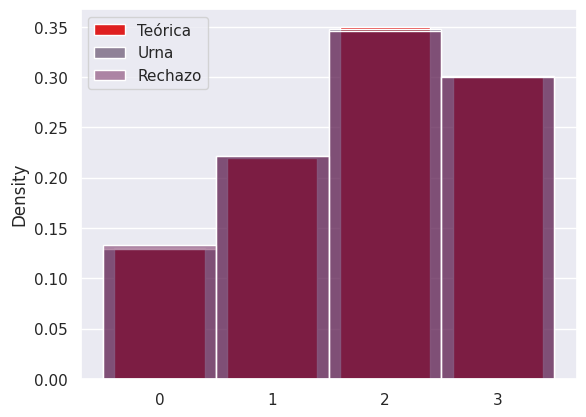

In [45]:
Nsim = 10_000

MR_samples = [algo_x(p=p_X) for _ in range(Nsim)]
Urn_samples = [UrnaX() for _ in range(Nsim)]
x_values = [0,1,2,3]
p_X_values = [p_X(x) for x in x_values]

sns.barplot(x=x_values, y=p_X_values, color='red' , label="Teórica")
sns.histplot(Urn_samples, stat='density', discrete=True, alpha=0.5, color=pallete[0], label="Urna")
sns.histplot(MR_samples, stat='density', discrete=True, alpha=0.5, color=pallete[1], label="Rechazo")

plt.legend()
plt.show()
